<a href="https://colab.research.google.com/github/neel26desai/cmpe255_clustering/blob/main/DBScanPycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pycaret[full]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import ClusteringExperiment
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 150

In [2]:
from pycaret.datasets import get_data

In [3]:
# data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [5]:
data.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


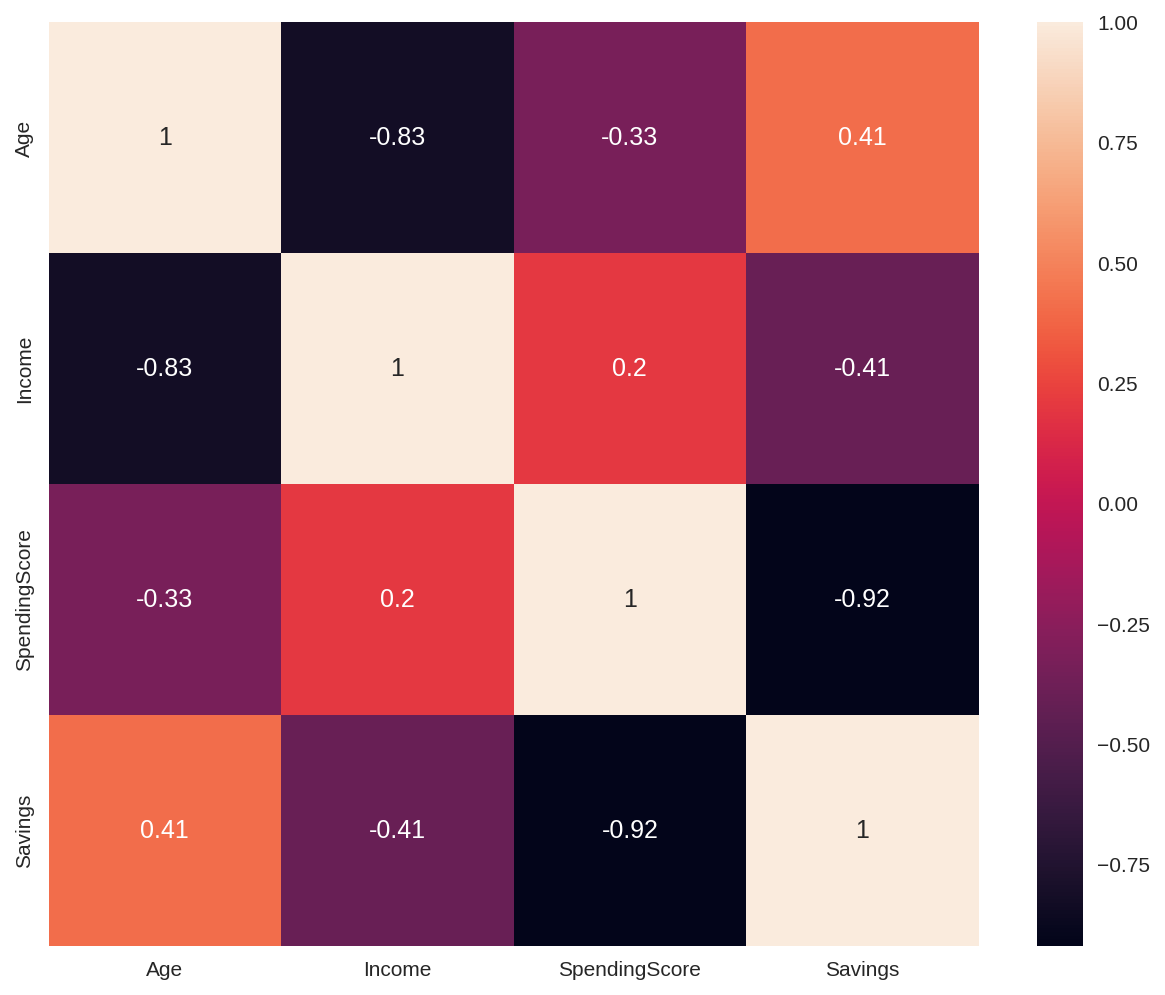

In [6]:
#correlation of columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

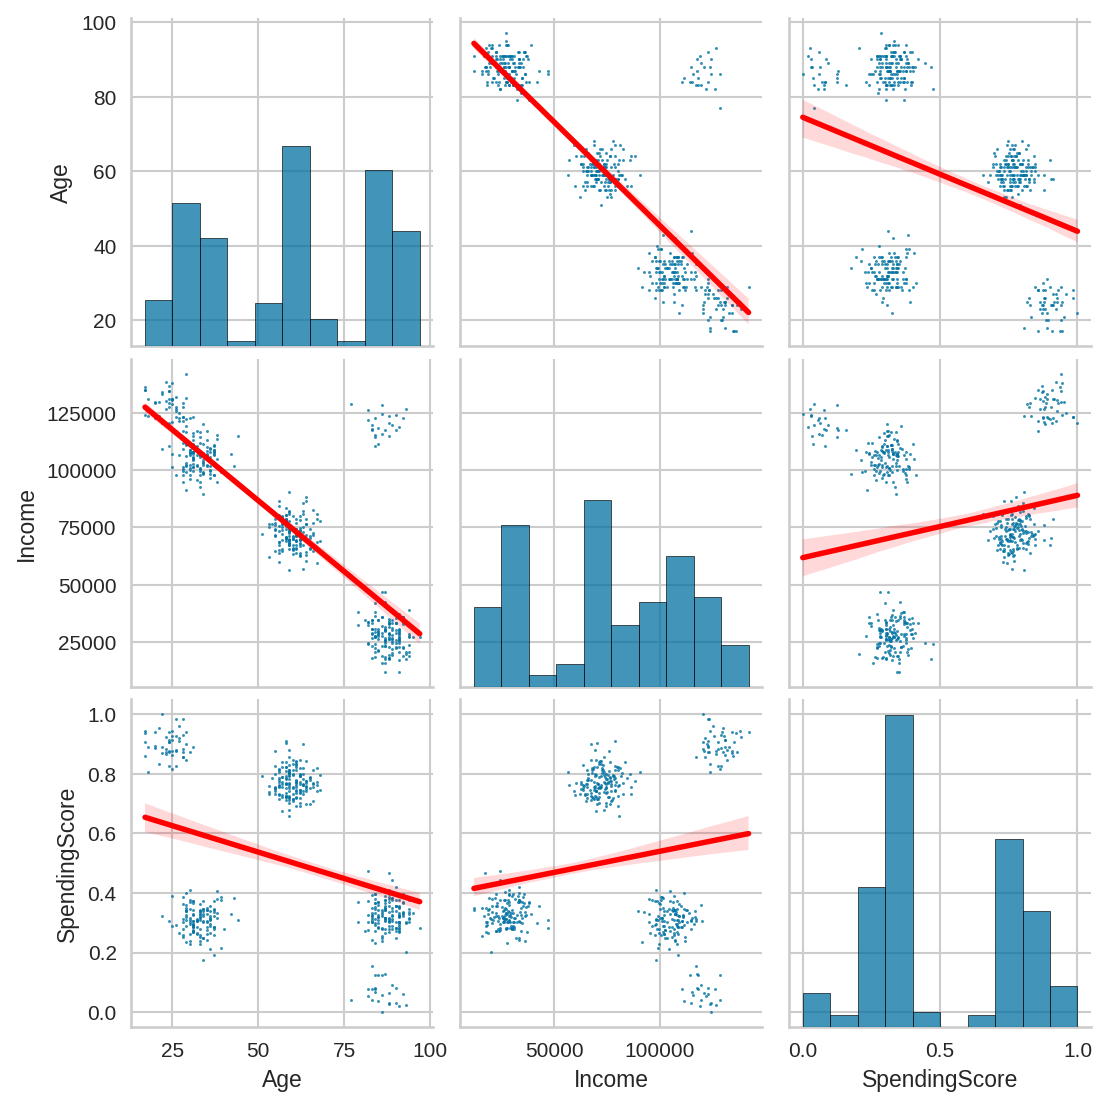

In [7]:
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}
sns.pairplot(data, kind='reg', vars=data.columns[:-1], plot_kws=plot_kws)
plt.show()

In [8]:
exp=ClusteringExperiment()

In [9]:
exp.setup(data, normalize=True ,session_id = 332)

,Description,Value
0,Session id,332
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [10]:
dbscan_model=exp.create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8049,3671.3580,0.2762,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
dbscan_model

DBSCAN(n_jobs=-1)

In [12]:
# Assign the labels to the dataframe
dbscan_results = exp.assign_model(dbscan_model)


In [13]:
# Plot the clusters
exp.plot_model(dbscan_model, plot = 'cluster')